In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
import sentencepiece
import nltk
nltk.download('stopwords')
from collections import Counter
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from sklearn.metrics import classification_report
from transformers import TFAlbertModel
from transformers import TFRobertaModel
from transformers import TFDistilBertModel
from transformers import AlbertTokenizer
from transformers import RobertaTokenizer
from transformers import DistilBertTokenizer
import glob
from transformers import *
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import patoolib
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")
import os
import glob
import numpy as np
import itertools
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
import warnings

Using TensorFlow backend.


# Preprocessing

In [17]:
INPUT_DIR = 'D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset/**'
 
dataset = []
for filename in glob.iglob(INPUT_DIR):
    kolkuPoKlasa=0
    print(filename)
    for f in glob.iglob(filename+'/**'):
        
        if (kolkuPoKlasa>750):
            kolkuPoKlasa=0
            break
        if os.path.exists(f):
            label = os.path.basename(filename)
            duration = librosa.get_duration(filename=f)
            #print('label', f, 'duration', duration)
            # skip audio smaller than 2 secs
            if duration >= 2:
                kolkuPoKlasa+=1
                #slice_size = 3
                #iterations = int((duration - slice_size) / (slice_size - 1))
                iterations = 1
                #initial_offset = (duration - ((iterations * (slice_size - 1)) + 1)) / 2
                for i in range(iterations):
                    #offset = initial_offset + i * (slice_size - 1)
                    offset = 0
                    if (label == "finish"):
                        dataset.append({
                            "filename": f,
                            "label": "finish",
                            "offset": offset
                        })
                    elif (label == "georgian"):
                        dataset.append({
                            "filename": f,
                            "label": "georgian",
                            "offset": offset
                        })
                    elif (label == "hungarian"):
                        dataset.append({
                            "filename": f,
                            "label": "hungarian",
                            "offset": offset
                        })
                    elif (label == "japanese"):
                        dataset.append({
                            "filename": f,
                            "label": "japanese",
                            "offset": offset
                        })
                    elif (label == "ltalian"):
                        dataset.append({
                            "filename": f,
                            "label": "ltalian",
                            "offset": offset
                        })
                    elif (label == "slovenian"):
                        dataset.append({
                            "filename": f,
                            "label": "slovenian",
                            "offset": offset
                        })
                    elif (label == "swedish"):
                        dataset.append({
                            "filename": f,
                            "label": "swedish",
                            "offset": offset
                        })
                    elif (label == "thai"):
                        dataset.append({
                            "filename": f,
                            "label": "thai",
                            "offset": offset
                        })
                    elif (label == "greek"):
                        dataset.append({
                            "filename": f,
                            "label": "greek",
                            "offset": offset
                        })
                    else:
                        dataset.append({
                            "filename": f,
                            "label": "viatnamese",
                            "offset": offset
                        })
        
print('dlzina na dataset: ',len(dataset))


D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungarian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japanese
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltalian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thai
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese
dlzina na dataset:  7510


In [19]:
print(len(dataset),' pred')
# naoganje i brishenje na prazni samples
nuli = []
for i in range(0,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=2)
  if y.any() == 0:
    nuli.append(i)
print(nuli)


7510  pred
[234, 326, 653, 1082, 1188, 1201, 1979, 2371, 2632, 2804, 2876, 3046, 3377, 3474, 4049, 4839, 5060, 5463, 5971, 6284]


In [20]:
dataset = dataset.drop(index=nuli)
print('po izbrisheni dolzijna',len(dataset))

po izbrisheni dolzijna 7490


In [22]:
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7490 entries, 3947 to 5505
Data columns (total 3 columns):
filename    7490 non-null object
label       7490 non-null object
offset      7490 non-null int64
dtypes: int64(1), object(2)
memory usage: 234.1+ KB


In [25]:

train, test = train_test_split(dataset, test_size=0.2, random_state=42)
x_train = []
x_test = []
x_val = []

encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)

y_test =  encoder.transform(test[:int(len(test)*0.5)].label)
y_val =   encoder.transform(test[int(len(test)*0.5):].label)

for idx in range(len(train)):
    x_train.append(extract_features(train.filename.iloc[idx], train.offset.iloc[idx]))

# 10 % test data
for idx in range(0,len(test)//2):
    x_test.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))
    

# 10% val data
for idx in range(len(test)//2,len(test)):
    x_val.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))
    



In [26]:
x_test = np.asarray(x_test)
x_val = np.asarray(x_val)
x_train = np.asarray(x_train)


    # Compute class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    #test
#class_weights = {i: class_weights[i] for i in range(len(class_weights))}
    #test
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

print("X validation:", x_val.shape)
print("Y validation:", y_val.shape)

print(class_weights)

X train: (5992, 40, 87, 1)
Y train: (5992, 10)
X test: (749, 40, 87, 1)
Y test: (749, 10)
X validation: (749, 40, 87, 1)
Y validation: (749, 10)
[1.00536913 0.98390805 1.01904762 1.00368509 0.99041322 0.99041322
 0.99205298 1.00200669 1.01387479 1.00033389]


In [27]:
#Extract MFCC from spectogram
def extract_features(audio_path, offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=2.0)

    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048,
                                       hop_length=512,
                                       n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)

    return mfccs




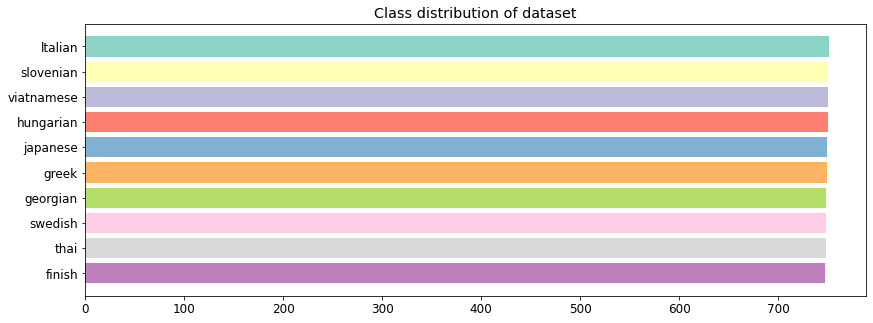

In [28]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 10
class_counts = dataset.label.value_counts()
cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
plt.barh(range(num_classes)[::-1], class_counts, tick_label=dataset.label.unique(),
         color=colors)
plt.title('Class distribution of dataset')
plt.show()

D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltalian\common_voice_lt_23705988.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17568367.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_23322817.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungarian\common_voice_hu_23235976.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japanese\common_voice_ja_19507436.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20432979.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358027.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18710581.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thai\common_voice_th_23646664.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23420107.mp3


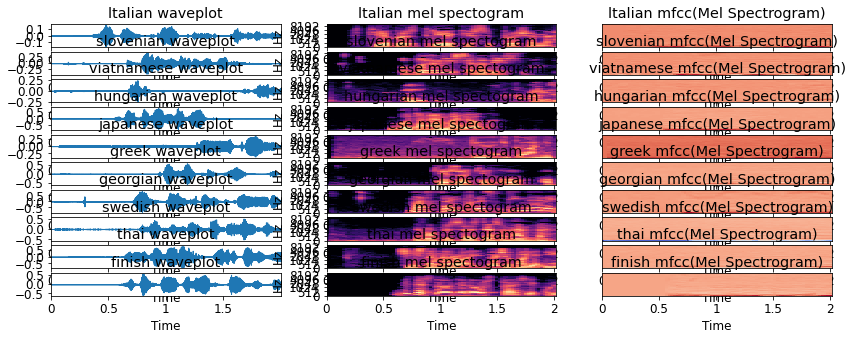

In [29]:
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[3], duration=2)
    print(dataset[dataset.label==label].filename.iloc[3])
    
    # Wave plot
    idx+=1
    
    plt.subplot(10, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(10, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(10, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

# Model

In [37]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 39, 86, 16)        80        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 43, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 19, 43, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 42, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 21, 32)         0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 9, 21, 32)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 20, 64)        

In [38]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=333,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights,
                    shuffle=True)


model_name = "language_classifier-2s.h5"
model.save(model_name)

Train on 5992 samples, validate on 749 samples
Epoch 1/333
5992/5992 [==============================] - 13s 2ms/step - loss: 5.7818 - accuracy: 0.1205 - val_loss: 2.2759 - val_accuracy: 0.1041
Epoch 2/333
5992/5992 [==============================] - 12s 2ms/step - loss: 2.2857 - accuracy: 0.1619 - val_loss: 2.2173 - val_accuracy: 0.2056
Epoch 3/333
5992/5992 [==============================] - 12s 2ms/step - loss: 2.1204 - accuracy: 0.2356 - val_loss: 2.0822 - val_accuracy: 0.2790
Epoch 4/333
5992/5992 [==============================] - 12s 2ms/step - loss: 1.9502 - accuracy: 0.3077 - val_loss: 1.8421 - val_accuracy: 0.4352
Epoch 5/333
5992/5992 [==============================] - 13s 2ms/step - loss: 1.7908 - accuracy: 0.3710 - val_loss: 1.6747 - val_accuracy: 0.4766
Epoch 6/333
5992/5992 [==============================] - 13s 2ms/step - loss: 1.6950 - accuracy: 0.4147 - val_loss: 1.5313 - val_accuracy: 0.5381
Epoch 7/333
5992/5992 [==============================] - 14s 2ms/step - loss:

5992/5992 [==============================] - 14s 2ms/step - loss: 0.6304 - accuracy: 0.7954 - val_loss: 0.5229 - val_accuracy: 0.8425
Epoch 57/333
5992/5992 [==============================] - 15s 2ms/step - loss: 0.6257 - accuracy: 0.7917 - val_loss: 0.5134 - val_accuracy: 0.8598
Epoch 58/333
5992/5992 [==============================] - 14s 2ms/step - loss: 0.6293 - accuracy: 0.7934 - val_loss: 0.5367 - val_accuracy: 0.8425
Epoch 59/333
5992/5992 [==============================] - 16s 3ms/step - loss: 0.6201 - accuracy: 0.8002 - val_loss: 0.5106 - val_accuracy: 0.8505
Epoch 60/333
5992/5992 [==============================] - 17s 3ms/step - loss: 0.6010 - accuracy: 0.8064 - val_loss: 0.4958 - val_accuracy: 0.8465
Epoch 61/333
5992/5992 [==============================] - 16s 3ms/step - loss: 0.6080 - accuracy: 0.8012 - val_loss: 0.5163 - val_accuracy: 0.8344
Epoch 62/333
5992/5992 [==============================] - 15s 2ms/step - loss: 0.6032 - accuracy: 0.8022 - val_loss: 0.4820 - val_a

Epoch 112/333
5992/5992 [==============================] - 17s 3ms/step - loss: 0.4056 - accuracy: 0.8650 - val_loss: 0.3598 - val_accuracy: 0.8959
Epoch 113/333
5992/5992 [==============================] - 15s 3ms/step - loss: 0.4085 - accuracy: 0.8625 - val_loss: 0.3618 - val_accuracy: 0.8852
Epoch 114/333
5992/5992 [==============================] - 14s 2ms/step - loss: 0.4026 - accuracy: 0.8647 - val_loss: 0.3671 - val_accuracy: 0.8932
Epoch 115/333
5992/5992 [==============================] - 12s 2ms/step - loss: 0.3794 - accuracy: 0.8718 - val_loss: 0.3690 - val_accuracy: 0.8812
Epoch 116/333
5992/5992 [==============================] - 12s 2ms/step - loss: 0.4029 - accuracy: 0.8613 - val_loss: 0.3690 - val_accuracy: 0.8838
Epoch 117/333
5992/5992 [==============================] - 11s 2ms/step - loss: 0.3937 - accuracy: 0.8683 - val_loss: 0.3333 - val_accuracy: 0.8959
Epoch 118/333
5992/5992 [==============================] - 11s 2ms/step - loss: 0.3869 - accuracy: 0.8703 - val_

5992/5992 [==============================] - 15s 3ms/step - loss: 0.3061 - accuracy: 0.8932 - val_loss: 0.3074 - val_accuracy: 0.9039
Epoch 168/333
5992/5992 [==============================] - 16s 3ms/step - loss: 0.3213 - accuracy: 0.8920 - val_loss: 0.3182 - val_accuracy: 0.8959
Epoch 169/333
5992/5992 [==============================] - 16s 3ms/step - loss: 0.3126 - accuracy: 0.8944 - val_loss: 0.3051 - val_accuracy: 0.9025
Epoch 170/333
5992/5992 [==============================] - 15s 3ms/step - loss: 0.3100 - accuracy: 0.8927 - val_loss: 0.3068 - val_accuracy: 0.9052
Epoch 171/333
5992/5992 [==============================] - 12s 2ms/step - loss: 0.3124 - accuracy: 0.8947 - val_loss: 0.2996 - val_accuracy: 0.9065
Epoch 172/333
5992/5992 [==============================] - 15s 2ms/step - loss: 0.3164 - accuracy: 0.8922 - val_loss: 0.3117 - val_accuracy: 0.8945
Epoch 173/333
5992/5992 [==============================] - 15s 2ms/step - loss: 0.3101 - accuracy: 0.8972 - val_loss: 0.3057 -

5992/5992 [==============================] - 14s 2ms/step - loss: 0.2668 - accuracy: 0.9084 - val_loss: 0.2901 - val_accuracy: 0.9065
Epoch 223/333
5992/5992 [==============================] - 15s 3ms/step - loss: 0.2626 - accuracy: 0.9090 - val_loss: 0.2990 - val_accuracy: 0.9119
Epoch 224/333
5992/5992 [==============================] - 16s 3ms/step - loss: 0.2699 - accuracy: 0.9072 - val_loss: 0.2988 - val_accuracy: 0.9105
Epoch 225/333
5992/5992 [==============================] - 14s 2ms/step - loss: 0.2659 - accuracy: 0.9112 - val_loss: 0.3017 - val_accuracy: 0.9079
Epoch 226/333
5992/5992 [==============================] - 13s 2ms/step - loss: 0.2577 - accuracy: 0.9139 - val_loss: 0.3105 - val_accuracy: 0.9012
Epoch 227/333
5992/5992 [==============================] - 13s 2ms/step - loss: 0.2416 - accuracy: 0.9159 - val_loss: 0.2955 - val_accuracy: 0.9132
Epoch 228/333
5992/5992 [==============================] - 15s 2ms/step - loss: 0.2674 - accuracy: 0.9097 - val_loss: 0.3083 -

5992/5992 [==============================] - 11s 2ms/step - loss: 0.2280 - accuracy: 0.9202 - val_loss: 0.3054 - val_accuracy: 0.9079
Epoch 278/333
5992/5992 [==============================] - 11s 2ms/step - loss: 0.2495 - accuracy: 0.9167 - val_loss: 0.2961 - val_accuracy: 0.9079
Epoch 279/333
5992/5992 [==============================] - 11s 2ms/step - loss: 0.2321 - accuracy: 0.9174 - val_loss: 0.2800 - val_accuracy: 0.9079
Epoch 280/333
5992/5992 [==============================] - 14s 2ms/step - loss: 0.2322 - accuracy: 0.9256 - val_loss: 0.2814 - val_accuracy: 0.9146
Epoch 281/333
5992/5992 [==============================] - 13s 2ms/step - loss: 0.2336 - accuracy: 0.9189 - val_loss: 0.2917 - val_accuracy: 0.9146
Epoch 282/333
5992/5992 [==============================] - 13s 2ms/step - loss: 0.2384 - accuracy: 0.9204 - val_loss: 0.2904 - val_accuracy: 0.9132
Epoch 283/333
5992/5992 [==============================] - 12s 2ms/step - loss: 0.2435 - accuracy: 0.9174 - val_loss: 0.3003 -

5992/5992 [==============================] - 11s 2ms/step - loss: 0.2242 - accuracy: 0.9244 - val_loss: 0.2755 - val_accuracy: 0.9159
Epoch 333/333
5992/5992 [==============================] - 11s 2ms/step - loss: 0.2350 - accuracy: 0.9239 - val_loss: 0.2615 - val_accuracy: 0.9092


In [40]:
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

749/749 [==============================] - 0s 547us/step
              precision    recall  f1-score   support

      finish       0.96      0.89      0.92        75
    georgian       0.91      0.93      0.92        67
       greek       0.95      1.00      0.97        87
   hungarian       0.95      0.94      0.94        81
    japanese       0.84      0.85      0.84        67
     ltalian       0.94      0.93      0.94        72
   slovenian       0.95      0.96      0.95        74
     swedish       0.93      0.95      0.94        66
        thai       0.94      0.96      0.95        76
  viatnamese       0.85      0.80      0.82        84

    accuracy                           0.92       749
   macro avg       0.92      0.92      0.92       749
weighted avg       0.92      0.92      0.92       749

